In [1]:
import numpy as np
from viznet import connecta2a, node_sequence, NodeBrush, EdgeBrush, DynamicShow

Press `c` to save figure to "RNN.png", `Ctrl+d` to break >>
> /home/ltb3/.conda/envs/mwo-lstm/lib/python3.6/site-packages/viznet/context.py(45)__exit__()
-> plt.savefig(self.filename, dpi=300)
(Pdb) c


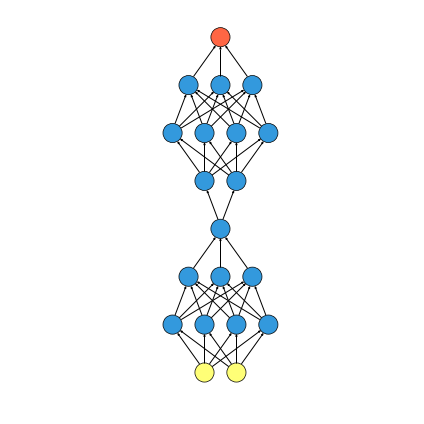

In [12]:
def draw_rnn(ax, num_node_list):
    '''
    draw a recurrent neural network.

    Args:
        num_node_list (list<int>): number of nodes in each layer.
    '''
    num_hidden_layer = len(num_node_list) -2
    token_list = ['\sigma^z'] + \
        ['y^{(%s)}' % (i + 1) for i in range(num_hidden_layer)] + ['\psi']
    kind_list = ['nn.input'] + ['nn.recurrent'] * num_hidden_layer + ['nn.output']
    radius_list = [0.3] + [0.2] * num_hidden_layer + [0.3]
    y_list = 1.5 * np.arange(len(num_node_list))

    seq_list = []
    for n, kind, radius, y in zip(num_node_list, kind_list, radius_list, y_list):
        b = NodeBrush(kind, ax)
        seq_list.append(node_sequence(b, n, center=(0, y)))

    eb = EdgeBrush('-->', ax)
    for st, et in zip(seq_list[:-1], seq_list[1:]):
        connecta2a(st, et, eb)


def real_bp():
    with DynamicShow((6, 6), 'RNN.png') as d:
        draw_rnn(d.ax, num_node_list=[2, 4, 3, 1, 2, 4, 3, 1])


if __name__ == '__main__':
    real_bp()

In [1]:
import random
from visualdl import LogWriter

logdir = "./RNN_log"
logger = LogWriter(logdir, sync_cycle=10000)

# mark the components with 'train' label.
with logger.mode("train"):
    # create a scalar component called 'scalars/scalar0'
    scalar0 = logger.scalar("scalars/scalar0")

# add some records during DL model running.
for step in range(100):
    scalar0.add_record(step, random.random())